In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import squarify
from collections import Counter
import warnings
import seaborn as sns
sns.set_style('white')
warnings.filterwarnings('ignore')
from scipy.stats import norm
pd.options.display.float_format = "{:.2f}".format
import re
import os
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS

In [2]:
kiva = pd.read_csv(r"Kiva\kiva_loans.csv")
kiva_loc = pd.read_csv(r"Kiva\kiva_mpi_region_locations.csv")

In [3]:
print('Kiva Shape: ',kiva.shape,'\n')
kiva = kiva.replace('The Democratic Republic of the Congo','Congo')
kiva['sex']=pd.DataFrame(kiva['borrower_genders'].astype(str).str.split(',').tolist())[0]

Kiva Shape:  (671205, 20) 



In [4]:
kiva.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,671205.00,671205.00,671205.00,657698.00,671205.00,671205.00
mean,993248.59,786.00,842.40,178.20,13.74,20.59
std,196611.28,1130.40,1198.66,94.25,8.60,28.46
min,653047.00,0.00,25.00,9.00,1.00,0.00
25%,823072.00,250.00,275.00,126.00,8.00,7.00
50%,992780.00,450.00,500.00,145.00,13.00,13.00
75%,1163653.00,900.00,1000.00,204.00,14.00,24.00
max,1340339.00,100000.00,100000.00,536.00,158.00,2986.00


In [5]:
t1 = kiva.isnull().sum().sort_values(ascending=False)
p1 = (kiva.isnull().sum()/kiva.isnull().count()).sort_values(ascending=False)*100
m1 = pd.concat([t1, p1], axis=1, keys=['total_missing', '%_missing'])
m1.head()

,total_missing,%_missing
tags,171416,25.54
region,56800,8.46
funded_time,48331,7.20
partner_id,13507,2.01
use,4232,0.63


In [6]:
kiva.sample(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,sex
172565,821483,175.00,175.00,Animal Sales,Agriculture,to buy animal feed for her animals.,PE,Peru,Morropón - Piura,PEN,...,2014-12-28 21:23:44+00:00,2014-11-28 08:00:00+00:00,2014-12-29 13:13:00+00:00,8.00,7,NaN,female,monthly,2014-12-28,female


In [7]:
kiva['loan_amount'].describe()

count   671205.00
mean       842.40
std       1198.66
min         25.00
25%        275.00
50%        500.00
75%       1000.00
max     100000.00
Name: loan_amount, dtype: float64

In [8]:
kiva['funded_amount'].describe()

count   671205.00
mean       786.00
std       1130.40
min          0.00
25%        250.00
50%        450.00
75%        900.00
max     100000.00
Name: funded_amount, dtype: float64

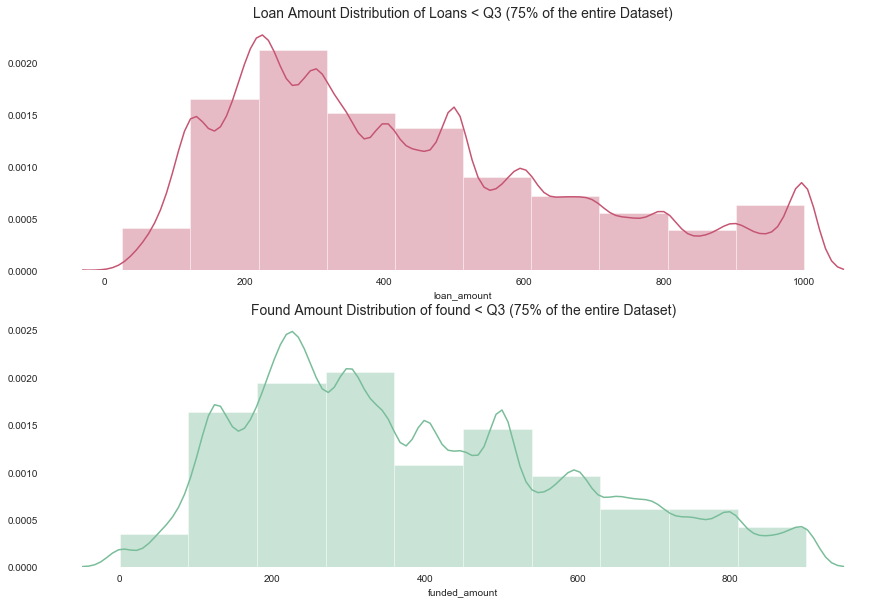

In [9]:
f,ax = plt.subplots(2,1,figsize=(15,10))
a0 = sns.distplot(kiva[kiva['loan_amount']<=1000.00]['loan_amount'], 
         color = '#c55572',bins=10,ax=ax[0])
a0.set_title('Loan Amount Distribution of Loans < Q3 (75% of the entire Dataset)',fontsize=14);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
a1 = sns.distplot(kiva[kiva['funded_amount']<=900.00]['funded_amount'], 
         color = '#79BD9A',bins=10,ax=ax[1])
a1.set_title('Found Amount Distribution of found < Q3 (75% of the entire Dataset)',fontsize=14);

# Loans by Countries

In [10]:
kiva.country.value_counts().head(5)

Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Name: country, dtype: int64

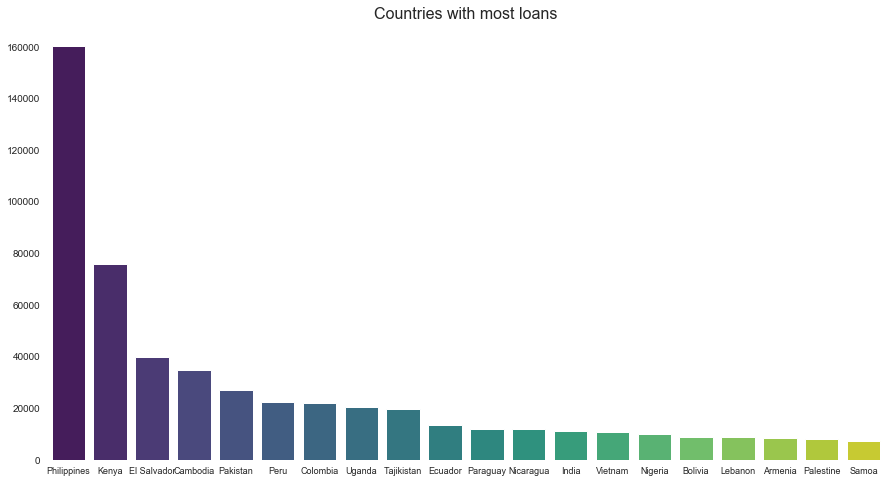

In [11]:
plt.figure(figsize=(15,8))
a=sns.barplot(x = kiva.country.value_counts().head(20).index,y=kiva.country.value_counts().head(20).values,palette='viridis')
plt.xticks(fontsize=9)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
a.set_title('Countries with most loans',fontsize=16);

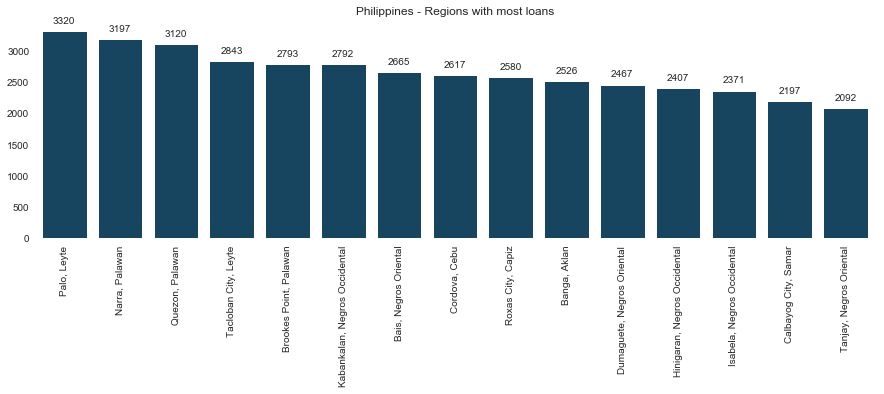

In [12]:
philippines = pd.DataFrame(kiva[kiva['country']=='Philippines'].region.value_counts()).head(15).reset_index()
fig, ax = plt.subplots(figsize=(15,4))
ax1=sns.barplot(x = philippines['index'],y=philippines.region,palette=['#0B486B'])
sns.despine(left=True, bottom=True)
plt.xticks(rotation = 90);
plt.xlabel('');
plt.ylabel('');
ax1.set_title('Philippines - Regions with most loans',fontsize=12)
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [13]:
l0 = kiva.groupby(['country'])['loan_amount'].sum().sort_values(ascending = False).head(15)
f0 = kiva.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).head(15)

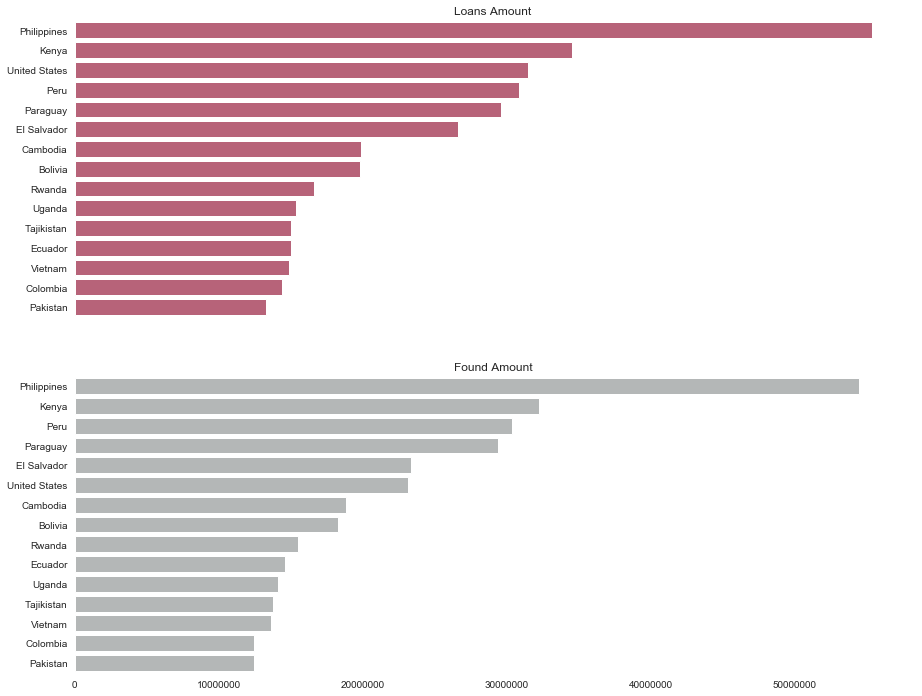

In [14]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
fig, ax = plt.subplots(2,1,figsize=(15,12),sharex=True)
ax1 = sns.barplot(y = l0.index,x=l0.values,ax=ax[0],palette=['#c55572'],orient='h')
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(y = f0.index,x=f0.values,ax=ax[1],palette=['#b3b7b8'],orient='h')
ax1.set_title('Loans Amount')
ax2.set_title('Found Amount')
ax1.set_ylabel('')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);

In [15]:
l0f0 = kiva.groupby(['country'])['loan_amount','funded_amount'].sum().sort_values(by='funded_amount',ascending = False).head(15).reset_index()
l0f0_tidy = l0f0.melt(id_vars='country')

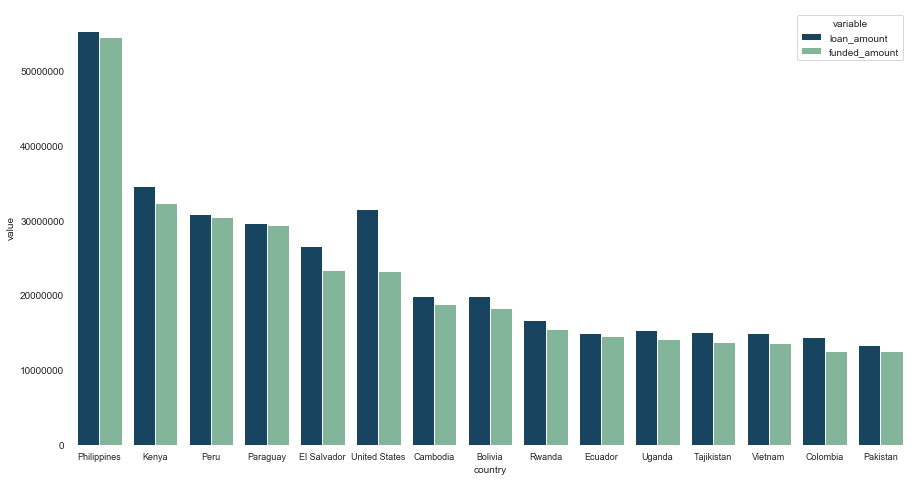

In [16]:
plt.figure(figsize=(15,8))
b = sns.barplot(y='value',x='country',hue='variable',data=l0f0_tidy,palette=['#0B486B','#79BD9A','#B5838D'])
plt.xticks(fontsize=9)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
b.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

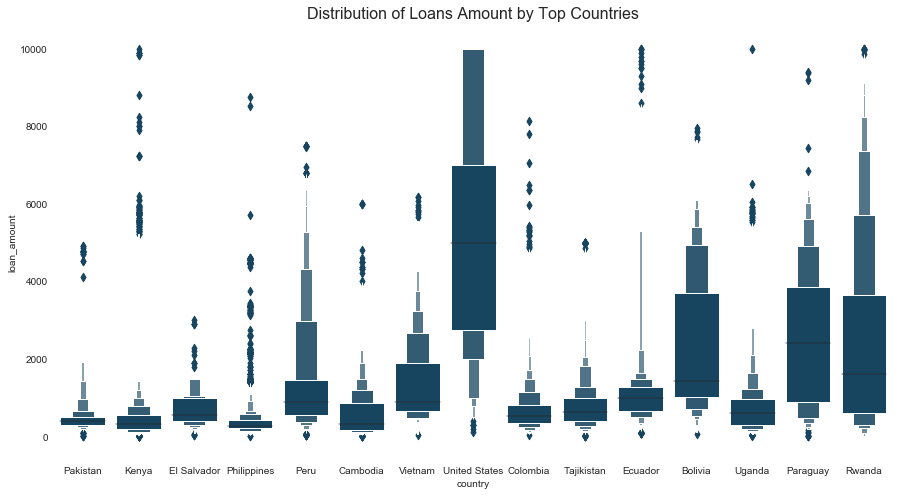

In [17]:
plt.figure(figsize=(15,8))
k1 = kiva[kiva['country'].isin(l0.index.tolist())]
k1 = k1[k1['loan_amount']<=10000.00]
a02 = sns.boxenplot(y=k1['loan_amount'],x=k1['country'],data=k1,palette=['#0B486B'],linewidth=0.7,
                  width=0.8),##boxprops=dict(alpha=.6)) #palette=['#c55572']
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Distribution of Loans Amount by Top Countries',fontsize=16);

In [18]:
mean_loan = pd.DataFrame(kiva[kiva['country'].isin(kiva['country'].value_counts().head(50).index.tolist())].groupby(['country'])['loan_amount'].agg(['mean']).sort_values(by='mean',ascending = False).head(15)).reset_index()
mean_found = pd.DataFrame(kiva[kiva['country'].isin(kiva['country'].value_counts().head(50).index.tolist())].groupby(['country'])['funded_amount'].agg(['mean']).sort_values(by='mean',ascending = False).head(15)).reset_index()
mean_loan.head()

,country,mean
0,United States,5169.27
1,Congo,3763.64
2,Paraguay,2489.21
3,Rwanda,2471.61
4,Bolivia,2253.38


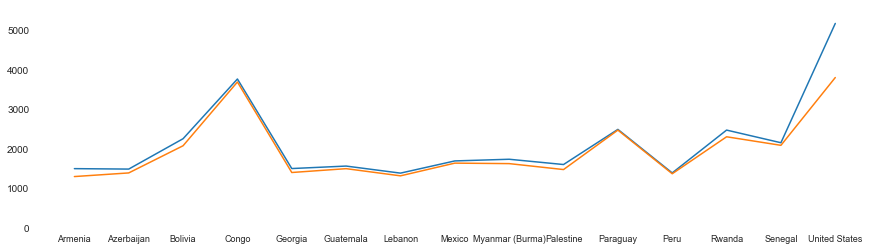

In [19]:
fig, ax = plt.subplots(figsize=(15,4))
ax1 = sns.lineplot(x = mean_loan['country'],y=mean_loan['mean'],palette=['#c55572'])
ax1.set_ylim(0,5500)
sns.despine(left=True, bottom=True)
ax2 = sns.lineplot(x = mean_found['country'],y=mean_found['mean'],palette=['#0B486B'])
plt.xlabel('');
plt.ylabel('');
plt.xticks(fontsize=9);

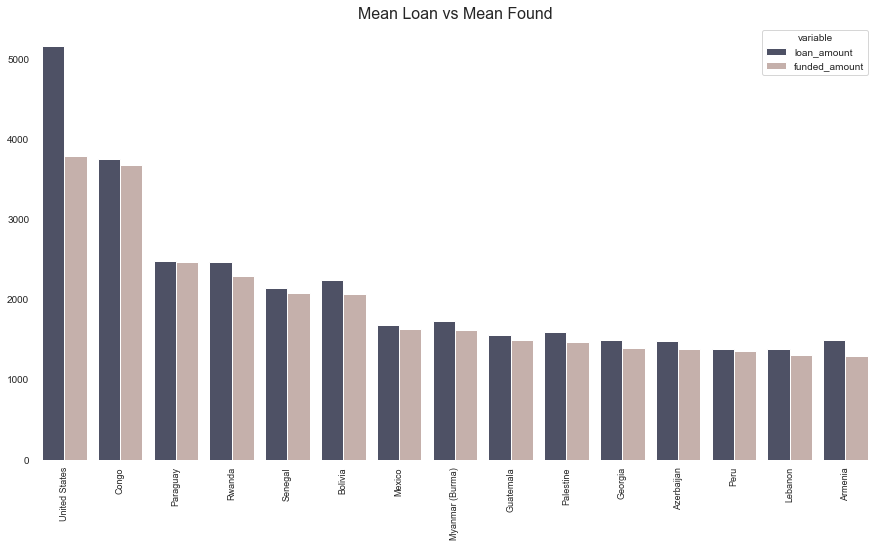

In [20]:
ovo = kiva[kiva['country'].isin(kiva['country'].value_counts().head(50).index.tolist())]
ovo = ovo.groupby(['country'])['loan_amount','funded_amount'].mean().sort_values(by='funded_amount',ascending = False).head(15).reset_index()
ovo_tidy = ovo.melt(id_vars='country')
plt.figure(figsize=(15,8))
c = sns.barplot(y='value',x='country',hue='variable',data=ovo_tidy,palette=['#4A4E69','#C9ADA7','#B5838D'])
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
c.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('');
plt.ylabel('');
plt.title('Mean Loan vs Mean Found',fontsize=16);

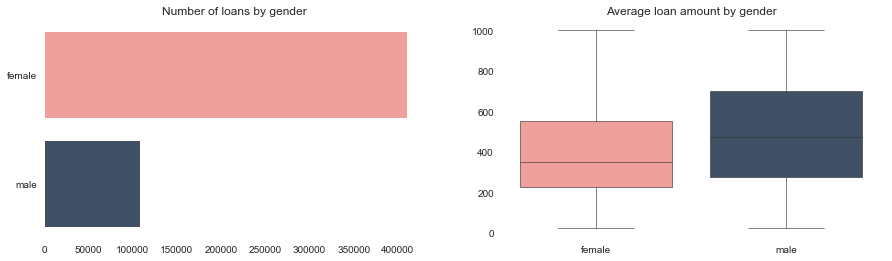

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,4))
a1 = sns.boxplot(y='loan_amount',x='sex',data=kiva[(kiva['sex'].isin(['male','female']))&(kiva['loan_amount']<=1000)],
            palette=['#FE938C','#3A506B'],ax=ax[1],linewidth=0.6)
a1.set_xlabel('');
a1.set_ylabel('');
a2 = sns.countplot(y='sex',data=kiva[(kiva['sex'].isin(['male','female']))&(kiva['loan_amount']<=1000)],
                   palette=['#FE938C','#3A506B'],ax=ax[0])
a2.set_xlabel('');
a2.set_ylabel('');
sns.despine(top=True, right=True, left=True, bottom=True, offset=None)
a2.set_title('Number of loans by gender',fontsize=12);
a1.set_title('Average loan amount by gender',fontsize=12);

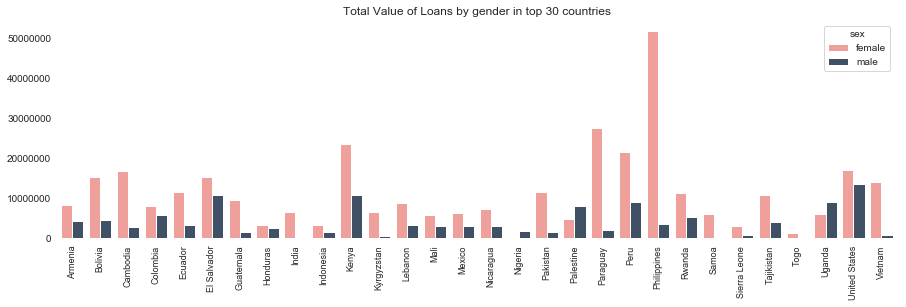

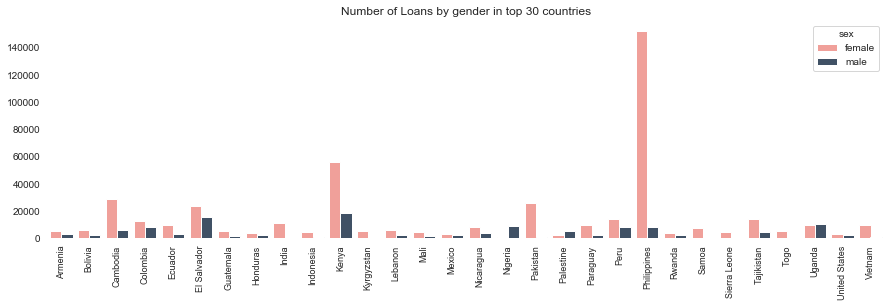

In [22]:
o1 = kiva[kiva['country'].isin(kiva['country'].value_counts().head(30).index.tolist())]
o1 = o1[o1['sex'].isin(['male','female'])].groupby(['country','sex'])['loan_amount'].sum().head(60).reset_index()
o2 = o1[o1['sex'].isin(['male','female'])].groupby(['country','sex'])['loan_amount'].count().head(60).reset_index()
plt.figure(figsize=(15,4))
c = sns.barplot(x='country',y='loan_amount',hue='sex',data=o1,palette=['#FE938C','#3A506B'])
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
c.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
c.set_xlabel('');
c.set_ylabel('');
c.set_title('Total Value of Loans by gender in top 30 countries');
o2 = kiva[kiva['country'].isin(kiva['country'].value_counts().head(30).index.tolist())]
o2 = o2[o2['sex'].isin(['male','female'])].groupby(['country','sex'])['loan_amount'].count().head(60).reset_index()
plt.figure(figsize=(15,4))
d = sns.barplot(x='country',y='loan_amount',hue='sex',data=o2,palette=['#FE938C','#3A506B'])
d.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
d.set_xlabel('');
d.set_ylabel('');
d.set_title('Number of Loans by gender in top 30 countries');
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)

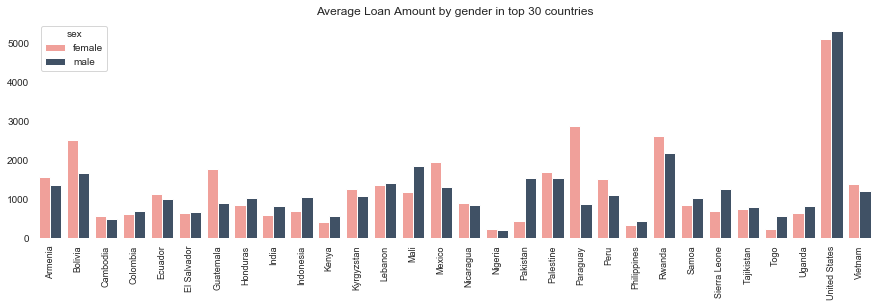

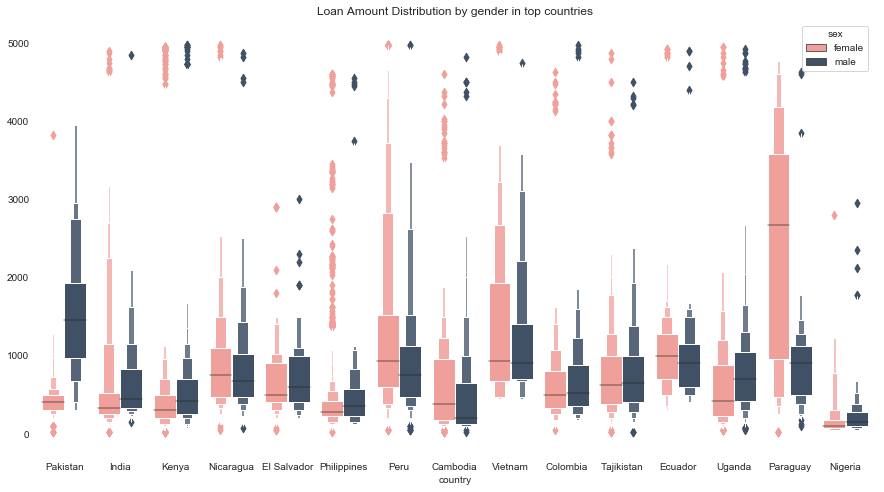

In [23]:
o3 = kiva[kiva['country'].isin(kiva['country'].value_counts().head(30).index.tolist())]
o3 = o3[o3['sex'].isin(['male','female'])].groupby(['country','sex'])['loan_amount'].mean().head(60).reset_index()
plt.figure(figsize=(15,4))
e = sns.barplot(x='country',y='loan_amount',hue='sex',data=o3,palette=['#FE938C','#3A506B'])
e.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
e.set_xlabel('');
e.set_ylabel('');
e.set_title('Average Loan Amount by gender in top 30 countries');
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
df1 = kiva[kiva['country'].isin(kiva['country'].value_counts().head(15).index.tolist())]
plt.figure(figsize=(15,8))
sns.boxenplot(y='loan_amount',x='country',hue='sex',data=df1[(df1['loan_amount']<5000)&(df1['sex'].isin(['male','female']))],
           palette=['#FE938C','#3A506B'])
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.title('Loan Amount Distribution by gender in top countries');
plt.ylabel('');

# Sector & Activities

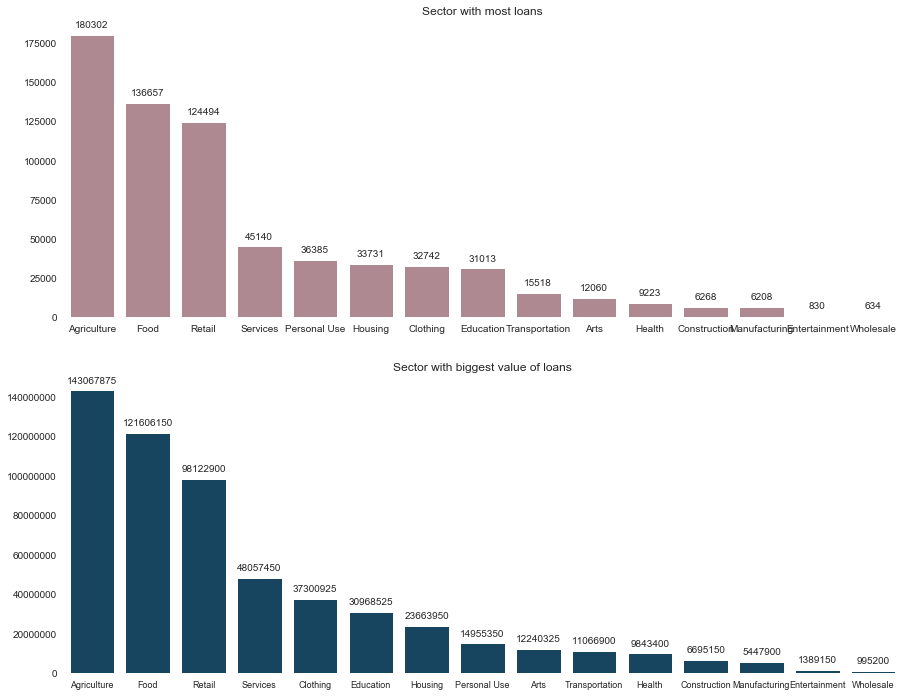

In [24]:
f,ax = plt.subplots(2,1,figsize=(15,12))

st2 = sns.barplot(x=kiva['sector'].value_counts().index,y=kiva['sector'].value_counts().values,ax=ax[0],palette=['#B5838D'])
sns.despine(left=True, bottom=True)
plt.xlabel('');
plt.ylabel('');
st2.set_title('Sector with most loans',fontsize=12)
plt.xticks(fontsize=9)
for p in st2.patches:
    st2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

s0 = kiva.groupby(['sector'])['loan_amount'].sum().sort_values(ascending = False)
st4 = sns.barplot(x = s0.index,y=s0.values,palette=['#0B486B'],orient='v',ax=ax[1])    
sns.despine(left=True, bottom=True)
plt.xlabel('');
plt.ylabel('');
plt.xticks(fontsize=9)
st4.set_title('Sector with biggest value of loans',fontsize=12)
st4.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
st2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
for p in st4.patches:
    st4.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

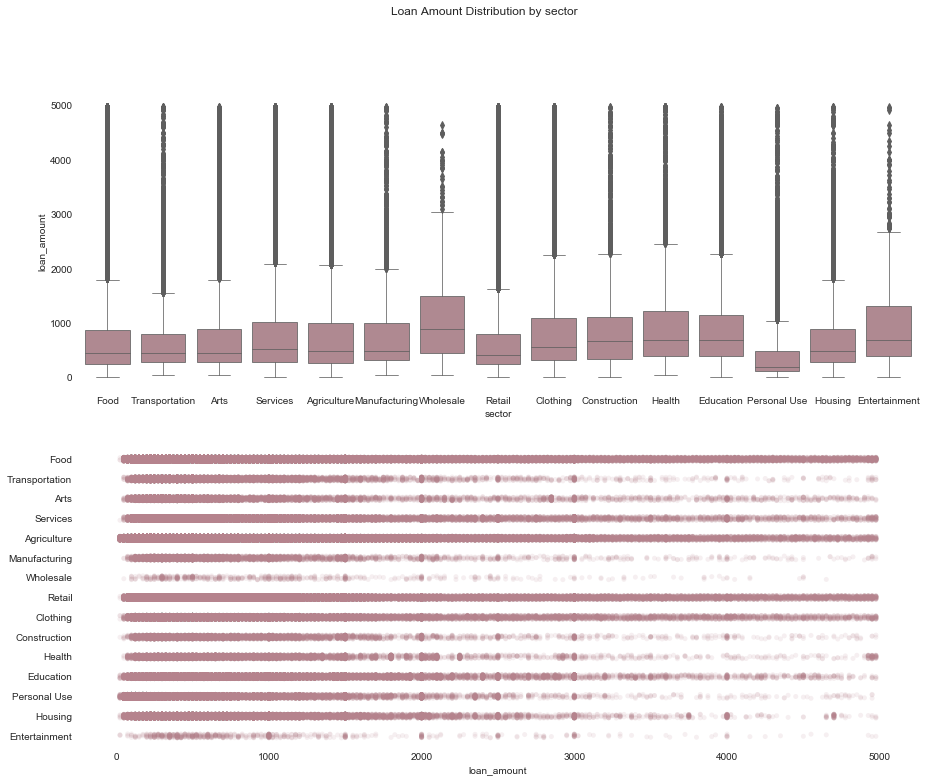

In [25]:
f,ax = plt.subplots(2,1,figsize=(15,12))
st3 = sns.stripplot(y='sector',x='loan_amount',data = kiva[kiva['loan_amount']<5000],
                   jitter=True, 
                   marker='o', 
                   alpha=0.12,
                   color='#B5838D',ax=ax[1]) #['#0B486B','#79BD9A','#B5838D']
plt.suptitle('Loan Amount Distribution by sector');
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.ylabel('');
st5 = sns.boxplot(x='sector',y='loan_amount',data = kiva[kiva['loan_amount']<5000],
                   color='#B5838D',ax=ax[0],linewidth=0.75) #['#0B486B','#79BD9A','#B5838D']
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False);
#plt.suptitle('Loan Amount Distribution by sector');
plt.ylabel('');

In [26]:
kiva.groupby(['sector'])['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Agriculture,180302.00,793.49,1068.46,25.00,275.00,500.00,1000.00,100000.00
Arts,12060.00,1014.95,1542.06,50.00,300.00,475.00,1000.00,50000.00
Clothing,32742.00,1139.24,1464.30,25.00,325.00,600.00,1200.00,50000.00
Construction,6268.00,1068.15,1477.48,25.00,350.00,700.00,1175.00,50000.00
Education,31013.00,998.57,1094.03,25.00,400.00,725.00,1200.00,50000.00
Entertainment,830.00,1673.67,2014.43,25.00,450.00,887.50,2000.00,10000.00
Food,136657.00,889.86,1261.16,25.00,250.00,450.00,950.00,50000.00
Health,9223.00,1067.27,1470.95,50.00,400.00,725.00,1275.00,50000.00
Housing,33731.00,701.55,709.18,25.00,300.00,500.00,900.00,49750.00


In [27]:
kiva['activity'].value_counts().head(15)

Farming                      72955
General Store                64729
Personal Housing Expenses    32448
Food Production/Sales        28106
Agriculture                  27023
Pigs                         26624
Retail                       24771
Clothing Sales               22339
Home Appliances              20267
Higher education costs       19742
Fruits & Vegetables          16610
Grocery Store                15102
Livestock                    13095
Fish Selling                 13060
Food                         10197
Name: activity, dtype: int64

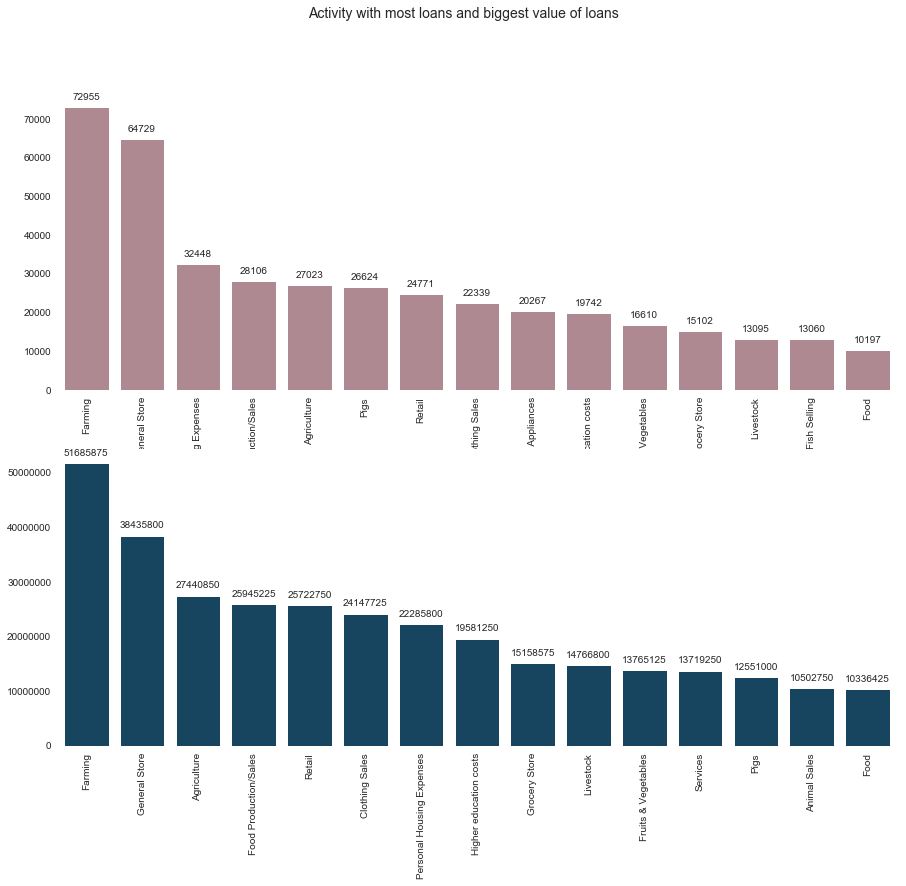

In [28]:
f,ax = plt.subplots(2,1,figsize=(15,12))

st6 = sns.barplot(x=kiva['activity'].value_counts().head(15).index,y=kiva['activity'].value_counts().head(15).values,ax=ax[0],palette=['#B5838D'])
sns.despine(left=True, bottom=True)
plt.xlabel('');
plt.ylabel('');
plt.suptitle('Activity with most loans and biggest value of loans',fontsize=14)
for tick in st6.get_xticklabels():
    tick.set_rotation(90)
for p in st6.patches:
    st6.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

s1 = kiva.groupby(['activity'])['loan_amount'].sum().sort_values(ascending = False).head(15)
st7 = sns.barplot(x = s1.index,y=s1.values,palette=['#0B486B'],orient='v',ax=ax[1])    
sns.despine(left=True, bottom=True)
plt.xlabel('');
plt.ylabel('');
st6.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
st7.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
for tick in st7.get_xticklabels():
    tick.set_rotation(90)
for p in st7.patches:
    st7.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [29]:
kiva.groupby(['activity'])['loan_amount'].describe().head(15)

,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
Adult Care,2.00,1687.50,194.45,1550.00,1618.75,1687.50,1756.25,1825.00
Agriculture,27023.00,1015.46,1903.92,25.00,350.00,650.00,1100.00,100000.00
Air Conditioning,36.00,1225.69,1656.18,225.00,475.00,875.00,1300.00,10000.00
Animal Sales,9237.00,1137.03,1239.73,25.00,400.00,625.00,1300.00,16975.00
Aquaculture,108.00,762.27,586.56,100.00,293.75,512.50,1068.75,2400.00
Arts,1092.00,1120.38,2463.55,50.00,300.00,500.00,1000.00,50000.00
Auto Repair,1336.00,1074.35,965.20,75.00,500.00,875.00,1325.00,12000.00
Bakery,3620.00,1125.99,1208.54,50.00,450.00,750.00,1250.00,20000.00
Balut-Making,61.00,397.95,259.70,100.00,225.00,300.00,450.00,1150.00


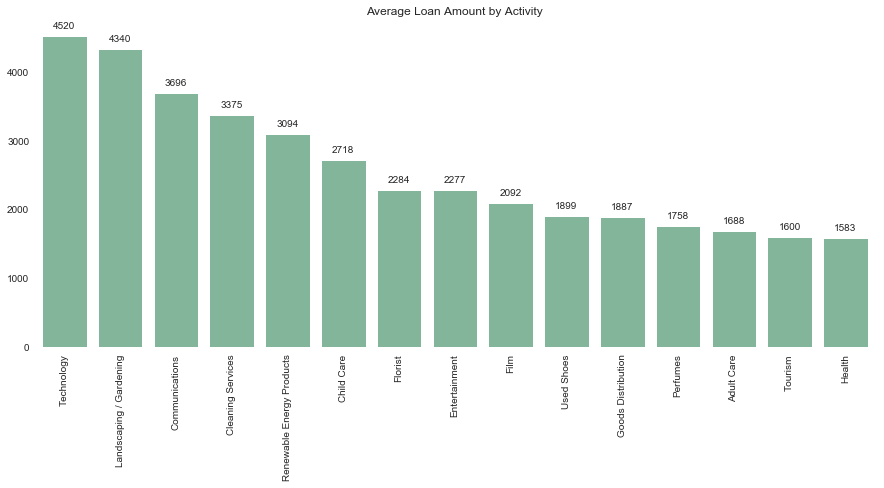

In [30]:
plt.figure(figsize=(15,6))
i1 = sns.barplot(x=kiva.groupby(['activity'])['loan_amount'].mean().sort_values(ascending=False).head(15).index,
            y=kiva.groupby(['activity'])['loan_amount'].mean().sort_values(ascending=False).head(15).values,
           palette=['#79BD9A'])
for tick in i1.get_xticklabels():
    tick.set_rotation(90)
for p in i1.patches:
    i1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    sns.despine(left=True, bottom=True)
plt.xlabel('');
plt.ylabel('');
i1.set_title('Average Loan Amount by Activity');

In [31]:
agri = kiva[kiva['sector'] == 'Agriculture']
food = kiva[kiva['sector'] == 'Food']
retail = kiva[kiva['sector'] == 'Retail']
services = kiva[kiva['sector'] == 'Services']
a_mean = pd.DataFrame(agri.groupby('activity')['loan_amount'].mean()).reset_index().sort_values(by='loan_amount',ascending=False)
f_mean = pd.DataFrame(food.groupby('activity')['loan_amount'].mean()).reset_index().sort_values(by='loan_amount',ascending=False)
r_mean = pd.DataFrame(retail.groupby('activity')['loan_amount'].mean()).reset_index().sort_values(by='loan_amount',ascending=False)
s_mean = pd.DataFrame(services.groupby('activity')['loan_amount'].mean()).reset_index().sort_values(by='loan_amount',ascending=False)

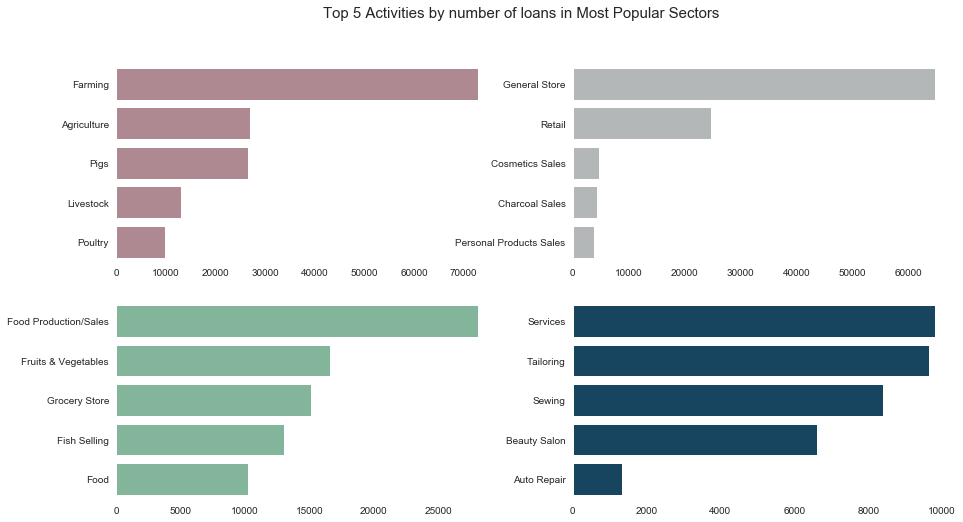

In [32]:
f,ax = plt.subplots(2,2,figsize=(15,8))
a1  = sns.barplot(y=agri['activity'].value_counts().head(5).index,
                  x=agri['activity'].value_counts().head(5).values,data=agri,ax=ax[0][0],palette=['#B5838D'])
a2  = sns.barplot(y=food['activity'].value_counts().head(5).index,
                  x=food['activity'].value_counts().head(5).values,data=food,ax=ax[1][0],palette=['#79BD9A'])
a3  = sns.barplot(y=retail['activity'].value_counts().head(5).index,
                  x=retail['activity'].value_counts().head(5).values,data=retail,ax=ax[0][1],palette=['#b3b7b8'])
a4  = sns.barplot(y=services['activity'].value_counts().head(5).index,
                  x=services['activity'].value_counts().head(5).values,data=services,ax=ax[1][1],palette=['#0B486B'])
plt.suptitle('Top 5 Activities by number of loans in Most Popular Sectors',fontsize=15);
a1.set_ylabel('');
a2.set_ylabel('');
a3.set_ylabel('');
a4.set_ylabel('');
a1.set_xlabel('');
a2.set_xlabel('');
a3.set_xlabel('');
a4.set_xlabel('');
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)

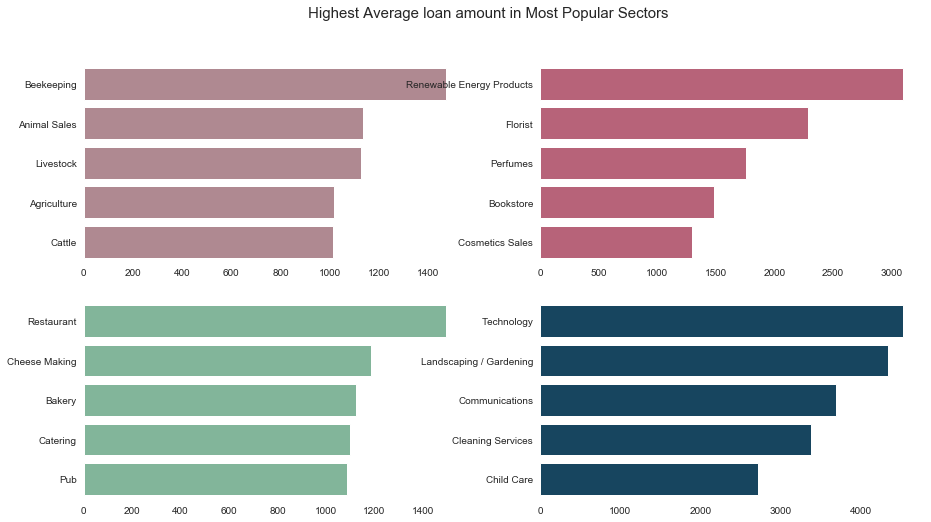

In [33]:
f,ax = plt.subplots(2,2,figsize=(15,8))
b1 = sns.barplot(y=a_mean['activity'].head(5),x=a_mean['loan_amount'].head(5),data=a_mean,palette=['#B5838D'],ax=ax[0][0])
b2 = sns.barplot(y=f_mean['activity'].head(5),x=f_mean['loan_amount'].head(5),data=f_mean,palette=['#79BD9A'],ax=ax[1][0])
b3 = sns.barplot(y=r_mean['activity'].head(5),x=r_mean['loan_amount'].head(5),data=r_mean,palette=['#c55572'],ax=ax[0][1])
b4 = sns.barplot(y=s_mean['activity'].head(5),x=s_mean['loan_amount'].head(5),data=s_mean,palette=['#0B486B'],ax=ax[1][1])
plt.suptitle('Highest Average loan amount in Most Popular Sectors',fontsize=15);
b1.set_ylabel('');
b2.set_ylabel('');
b3.set_ylabel('');
b4.set_ylabel('');
b1.set_xlabel('');
b2.set_xlabel('');
b3.set_xlabel('');
b4.set_xlabel('');
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)

In [34]:
kiva.sample()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,sex
56519,708968,725.00,725.00,Bakery,Food,"To buy flour, sugar and butter.",PE,Peru,Huaycan,PEN,...,2014-05-12 21:42:04+00:00,2014-05-08 07:00:00+00:00,2014-05-23 08:27:53+00:00,6.00,4,NaN,"female, female, female, female, female",irregular,2014-05-12,female


# TIME 

In [35]:
kiva['repayment_interval'].value_counts()

monthly      342717
irregular    257158
bullet        70728
weekly          602
Name: repayment_interval, dtype: int64

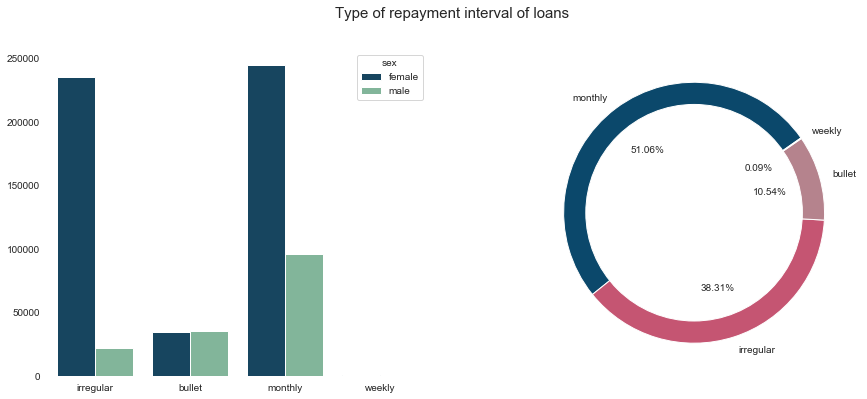

In [49]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
ao = sns.countplot(kiva[kiva['sex'].isin(['female','male'])]['repayment_interval'],palette=['#0B486B','#79BD9A','#c55572','#0B486B'],hue=kiva[kiva['sex'].isin(['female','male'])]['sex'],ax=ax[0])
ao.set_ylabel('');
ao.set_xlabel('');
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.suptitle('Type of repayment interval of loans',fontsize=15);
my_circle=plt.Circle( (0,0), 0.83, color='white')
names=kiva['repayment_interval'].value_counts().index.tolist()
size=kiva['repayment_interval'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=['#0B486B','#c55572','#B5838D','#79BD9A'],autopct='%1.2f%%',startangle=35)
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');

In [56]:
kiva['term_in_months'].describe()

count   671205.00
mean        13.74
std          8.60
min          1.00
25%          8.00
50%         13.00
75%         14.00
max        158.00
Name: term_in_months, dtype: float64

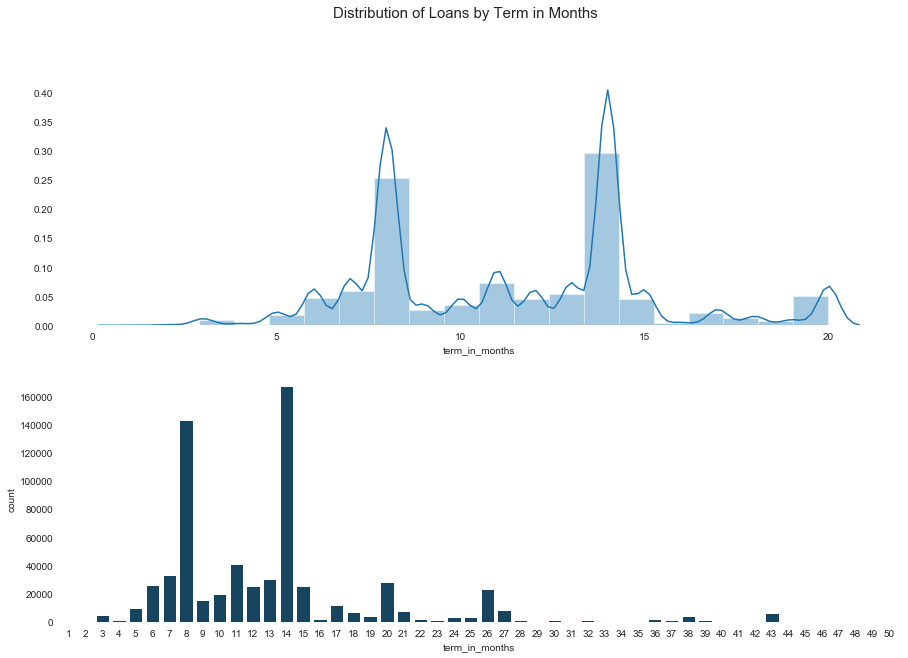

In [74]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.distplot(kiva[kiva['term_in_months']<=20]['term_in_months'],bins=20,ax=ax[0])
sns.countplot(kiva[kiva['term_in_months']<=50]['term_in_months'].astype(int),ax=ax[1],palette=['#0B486B']);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.suptitle('Distribution of Loans by Term in Months',fontsize=15);

In [93]:
k_terms = kiva[(kiva['country'].isin(kiva['country'].value_counts().head(30).index.tolist())) & (kiva['term_in_months']<=50)]
k_terms.groupby('country')['term_in_months'].mean()

country
Armenia         26.80
Bolivia         16.16
Cambodia        13.29
Colombia        17.71
Ecuador         12.00
El Salvador     15.68
Guatemala       13.61
Honduras        15.28
India           31.75
Indonesia       19.37
Kenya           12.19
Kyrgyzstan      15.37
Lebanon         14.72
Mali             7.95
Mexico          12.25
Nicaragua       14.37
Nigeria         16.61
Pakistan        13.51
Palestine       26.71
Paraguay        10.11
Peru             9.66
Philippines      9.59
Rwanda          10.73
Samoa           13.90
Sierra Leone     9.97
Tajikistan      15.92
Togo             8.79
Uganda          11.56
United States   26.44
Vietnam         17.62
Name: term_in_months, dtype: float64

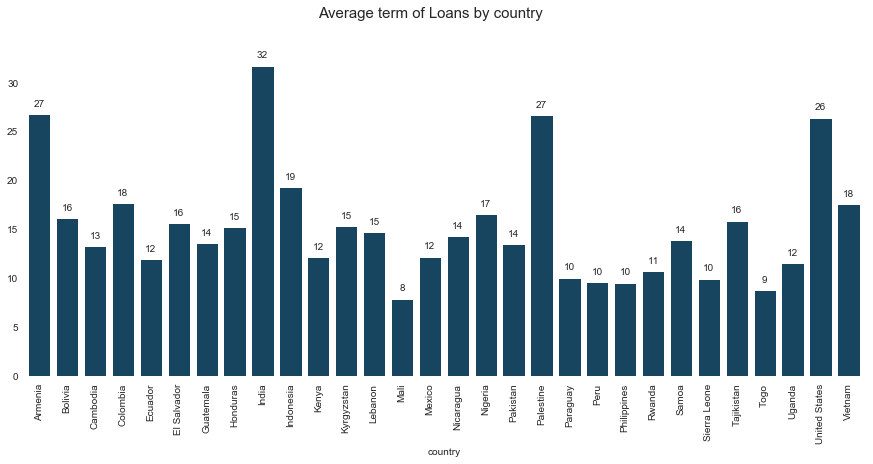

In [94]:
fig, ax = plt.subplots(figsize=(15,6))
t1 = sns.barplot(x=k_terms.groupby('country')['term_in_months'].mean().index,
            y=k_terms.groupby('country')['term_in_months'].mean().values,palette=['#0B486B'])
plt.xticks(rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.suptitle('Average term of Loans by country',fontsize=15);
for p in t1.patches:
    t1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

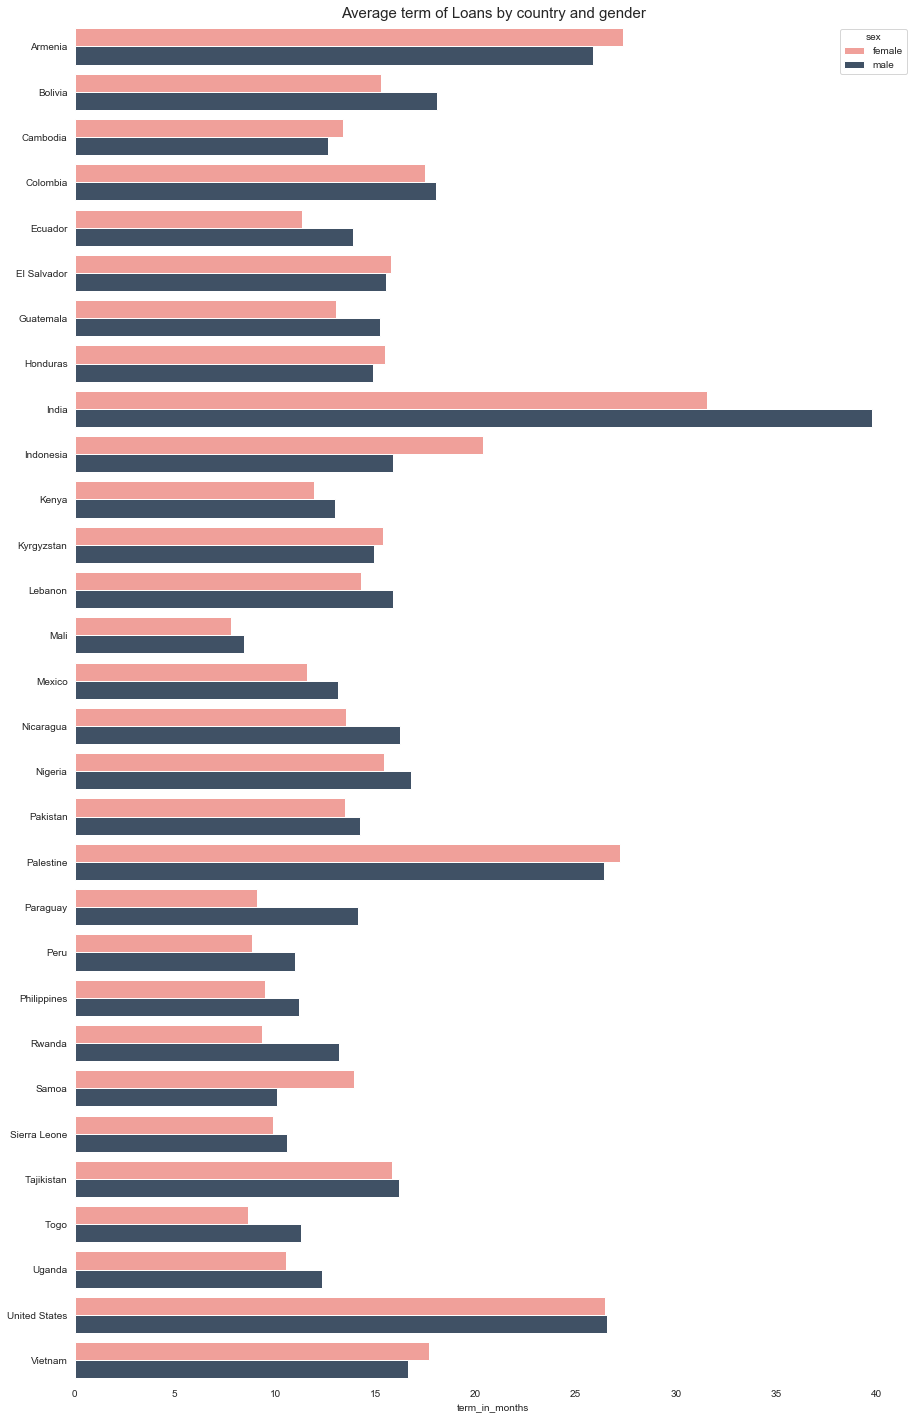

In [107]:
ts = pd.DataFrame(k_terms[k_terms['sex'].isin(['male','female'])].groupby(['country','sex'])['term_in_months'].mean()).reset_index()
fig, ax = plt.subplots(figsize=(15,25))
sns.barplot(x=ts['term_in_months'],y=ts['country'],data=ts,hue='sex',palette=['#FE938C','#3A506B']);
plt.title('Average term of Loans by country and gender',fontsize=15);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True);
plt.ylabel('');